In [2]:
# YOU MUST USE 3.6.0 AND ABOVE FOR RUNNING GLMNET
#install.packages("psycho")
library(data.table)
library("rvest")
#install.packages("zoo")
library("zoo")
library("dplyr")
#install.packages("scales")
#install.packages("rlang")
#install.packages("tidyverse")
library(tidyverse)
library(caret)
#library(glmnet)
#install.packages("bit64")
#library("bit64")
#install.packages('lm.beta')
library("lm.beta")
library("psycho")
#install.packages("standardize")
library("standardize")

In [3]:
start_time <- Sys.time()
new_data=fread("num_slim_data_2.csv")

end_time <- Sys.time()

end_time - start_time
dim(new_data)

Time difference of 11.18029 secs

[1] 478174    242

In [38]:
new_data=as.data.frame(new_data)

In [4]:
start_time <- Sys.time()
scale_data=fread("scale_data_3.csv")

end_time <- Sys.time()

end_time - start_time
dim(scale_data)

Time difference of 20.85161 secs

[1] 478174    241

In [40]:
scale_data=as.data.frame(scale_data)

In [ ]:
model_1=lm(data=new_data,formula=count~new_data[[1]])
model_1_s=lm(data=scale_data,formula=count~new_data[[1]])
print("summary model_1 first:")

summary(model_1)
cat("\n","\n","\n","\n","\n")
print("summary model_1_s second:")
summary(model_1_s)
cat("\n","\n","\n","\n","\n")
lm.beta(model_1)
cat("\n","\n","\n","\n","\n")
lm.beta(model_1_s)

In [24]:
sum_1=summary(model_1)
sum_1$adj.r.squared
sum(sum_1$residuals)

[1] 0.000519207

[1] 1.118515e-11

In [40]:
# capture model summary as an object
modelSummary <- summary(model_1)  

# model coefficients
modelCoeffs <- modelSummary$coefficients  

# get beta estimate for speed
beta.estimate <- modelCoeffs[2,1]

# get std.error for speed  
std.error <- modelCoeffs[2,2]  

# calc t statistic
t_value <- beta.estimate/std.error  

# calc p Value
p_value <- 2*pt(-abs(t_value), df=nrow(cars)-ncol(cars))  

# fstatistic
f_statistic <- model_1$fstatistic[1]  

# parameters for model p-value calc
f <- summary(model_1)$fstatistic
  
model_p <- pf(f[1], f[2], f[3], lower=FALSE)

In [43]:
beta.estimate
std.error
t_value
p_value
f_statistic
f
model_p

[1] -4.34796e-09

[1] 2.11546e-09

[1] -2.055327

[1] 0.04531018

NULL

value        numdf        dendf 
4.224367e+00 1.000000e+00 4.781720e+05

value 
0.03984802

In [38]:
modelCoeffs[2,1]
modelCoeffs

[1] -4.34796e-09

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),6.90034e+00,8.041839e-03,858.054998,0.00000000
new_data[[1]],-4.34796e-09,2.115460e-09,-2.055327,0.03984802


In [28]:
coeff=NULL
sum=NULL
model=NULL
r=NULL
beta=NULL
for (i in 1:242){
   
   model[[i]] <- lm(data=new_data,formula = count ~ new_data[[i]] )
   coeff[[i]]=model$coefficients
   sum[[i]]=summary(model[[i]])
    r[[i]]=sum[[i]]$adj.r.squared
    beta[[i]]=lm.beta(model[[i]])
}



Warning message in summary.lm(model[[i]]):
“essentially perfect fit: summary may be unreliable”

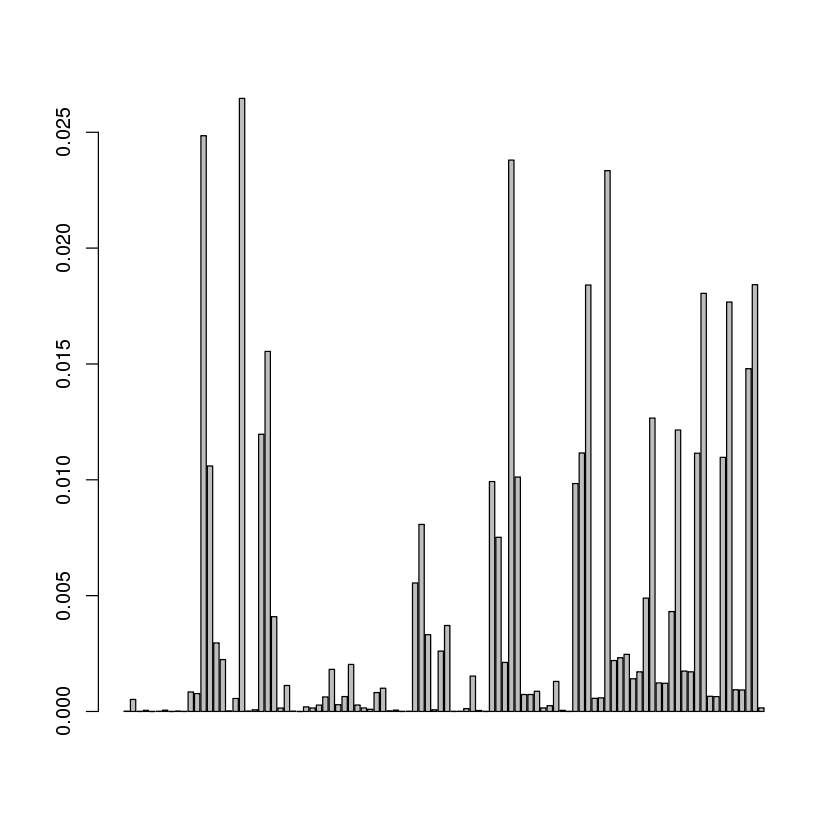

In [74]:
barplot(r)

In [60]:
new_beta=NULL
for (i in 1:242){
    new_beta[[i]]=abs(beta[[i]]$`coefficients`[2])
}
#beta[[1]]$`coefficients`[2]
#beta[[3]]$`coefficients`[2]



new_data[[i]] 
 -4.34796e-09

In [61]:
beta[[210]]$`coefficients`[2]

new_data[[i]] 
            1

In [62]:
which(new_beta>1)
which(new_beta==0)

[1]   3 131 132 146 149 150 151 152 153 162 165 167 179 183 198

integer(0)

In [63]:
new_beta[[131]]

[1] 1.63781

In [71]:
beta[[210]]$`coefficients`[2]

new_data[[i]] 
            1

In [103]:
for (i in 1:242){
    beta[[i]]=lm.beta(model[[i]])
}

In [104]:
beta

[[1]]

Call:
lm(formula = count ~ new_data[[i]], data = new_data)

Standardized Coefficients::
  (Intercept) new_data[[i]] 
   0.00000000   -0.00297226 


[[2]]

Call:
lm(formula = count ~ new_data[[i]], data = new_data)

Standardized Coefficients::
  (Intercept) new_data[[i]] 
   0.00000000   -0.02283193 


[[3]]

Call:
lm(formula = count ~ new_data[[i]], data = new_data)

Standardized Coefficients::
  (Intercept) new_data[[i]] 
            0             0 


[[4]]

Call:
lm(formula = count ~ new_data[[i]], data = new_data)

Standardized Coefficients::
  (Intercept) new_data[[i]] 
  0.000000000   0.007049919 


[[5]]

Call:
lm(formula = count ~ new_data[[i]], data = new_data)

Standardized Coefficients::
  (Intercept) new_data[[i]] 
 0.0000000000 -0.0008872714 


[[6]]

Call:
lm(formula = count ~ new_data[[i]], data = new_data)

Standardized Coefficients::
  (Intercept) new_data[[i]] 
  0.000000000   0.002666072 


[[7]]

Call:
lm(formula = count ~ new_data[[i]], data = new_data)

Sta

In [107]:
new_beta=NULL
for (i in 1:242){
    new_beta[i]=abs(beta[[i]]$`standardized.coefficients`[2])
}

In [102]:
beta[[1]]$`standardized.coefficients`[2]

new_data[[i]] 
  -0.00297226

In [85]:
new_beta_s=NULL
for (i in 1:241){
    new_beta_s[i]=abs(beta_s[[i]]$`coefficients`[2])
}

In [113]:
(new_beta>=1)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE

In [114]:
new_beta[210]<1

[1] TRUE

In [115]:
(new_beta_s>=1)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE

In [116]:
new_beta_ori=NULL
for (i in 1:242){
    new_beta_ori[i]=abs(beta[[i]]$`coefficients`[2])
}

In [141]:
which(new_beta>=0.45)

[1] 149 150 151 210

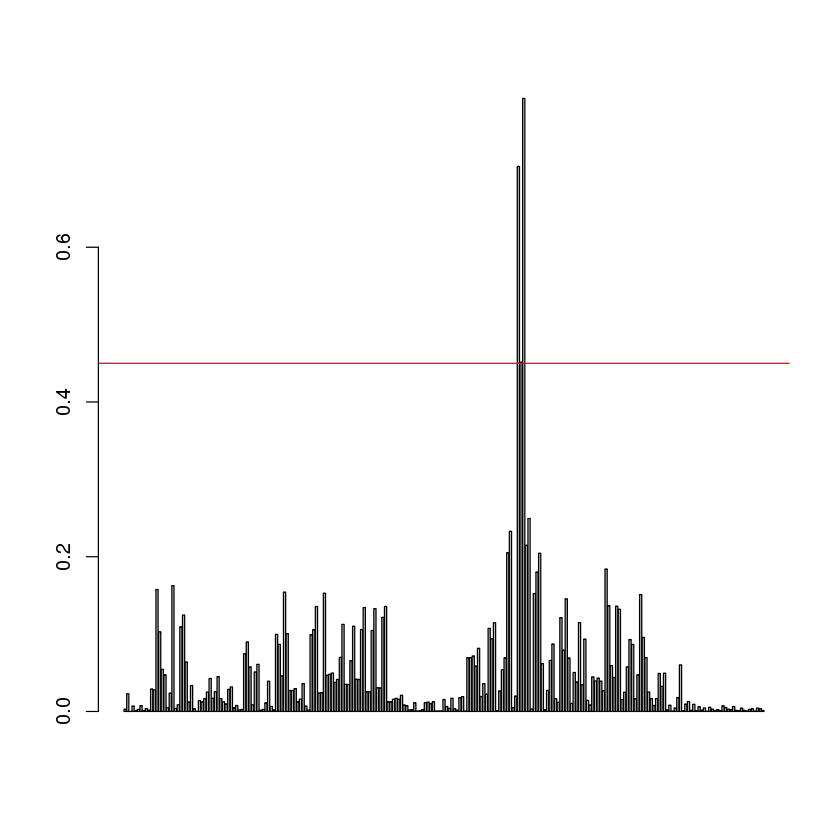

In [151]:
barplot(new_beta[-210])
abline(h = 0.45,col="red")

In [152]:
head(new_data[,c(149,150,151,210)])

30120-0.0,30130-0.0,30140-0.0,count
<dbl>,<dbl>,<dbl>,<dbl>
2.33,0.50,4.56,8.02
0.90,0.20,2.50,3.70
1.57,0.46,2.86,4.98
1.94,0.43,4.36,6.95
2.60,0.60,6.50,10.00
3.30,0.60,4.00,8.10


1. Lymphocyte count
2. Monocyte count
3. Neutrophill count

In [153]:
model_combine=lm(data=new_data,formula=count~new_data[[149]]+new_data[[150]]+new_data[[151]])
summary(model_combine)
lm.beta(model_combine)


Call:
lm(formula = count ~ new_data[[149]] + new_data[[150]] + new_data[[151]], 
    data = new_data)

Residuals:
   Min     1Q Median     3Q    Max 
-7.363 -0.094 -0.027  0.057 67.195 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.1117363  0.0009749   114.6   <2e-16 ***
new_data[[149]] 1.0128866  0.0002526  4009.7   <2e-16 ***
new_data[[150]] 1.0647763  0.0010981   969.7   <2e-16 ***
new_data[[151]] 1.0111929  0.0002034  4971.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1942 on 478170 degrees of freedom
Multiple R-squared:  0.9916,	Adjusted R-squared:  0.9916 
F-statistic: 1.889e+07 on 3 and 478170 DF,  p-value: < 2.2e-16



Call:
lm(formula = count ~ new_data[[149]] + new_data[[150]] + new_data[[151]], 
    data = new_data)

Standardized Coefficients::
    (Intercept) new_data[[149]] new_data[[150]] new_data[[151]] 
      0.0000000       0.5588899       0.1367735       0.6766844 


In [155]:
model_combine=lm(data=new_data,formula=count~new_data[[150]])
summary(model_combine)
lm.beta(model_combine)


Call:
lm(formula = count ~ new_data[[150]], data = new_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.298  -1.080  -0.207   0.846 176.907 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.21218    0.00551   945.9   <2e-16 ***
new_data[[150]]  3.51477    0.01005   349.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.894 on 478172 degrees of freedom
Multiple R-squared:  0.2038,	Adjusted R-squared:  0.2038 
F-statistic: 1.224e+05 on 1 and 478172 DF,  p-value: < 2.2e-16



Call:
lm(formula = count ~ new_data[[150]], data = new_data)

Standardized Coefficients::
    (Intercept) new_data[[150]] 
      0.0000000       0.4514817 


In [23]:
coeff_s=NULL
sum_s=NULL
model_s=NULL
r_s=NULL
beta_s=NULL
for (i in 1:241){
   
   model_s[[i]] <- lm(data=scale_data,formula = count ~ scale_data[[i]] )
   coeff_s[[i]]=model_s$coefficients
   sum_s[[i]]=summary(model_s[[i]])
    r_s[[i]]=sum_s[[i]]$adj.r.squared
    beta_s[[i]]=lm.beta(model_s[[i]])
}




Warning message in summary.lm(model_s[[i]]):
“essentially perfect fit: summary may be unreliable”

In [25]:
new_beta_s=NULL
for (i in 1:241){
    new_beta_s[i]=abs(beta_s[[i]]$`coefficients`[2])
}
beta_s[[1]]$`coefficients`[2]
#beta[[3]]$`coefficients`[2]




scale_data[[i]] 
    -0.00297226

In [54]:
which(new_beta_s>1)

[1] 209

In [53]:
new_beta_s[209]

[1] 1

In [27]:
new_beta[1:10]
new_beta_s[1:10]

[1]  4.347960e-09  5.976756e-03 1.944424e+307  1.187667e-06  1.503583e-07
 [6]  5.893327e-07  1.780564e-05  2.619799e-07  7.278053e-07  4.172795e-07

[1] 0.0029722603 0.0228319348 0.0070499186 0.0008872714 0.0026660717
 [6] 0.0075678082 0.0007356549 0.0038034546 0.0017549354 0.0290561643

In [43]:


model_1=lm(data=new_data,formula=count~new_data[[1]])



In [44]:
lm.beta(model_1)


Call:
lm(formula = count ~ new_data[[1]], data = new_data)

Standardized Coefficients::
  (Intercept) new_data[[1]] 
   0.00000000   -0.00297226 


In [45]:
model_1_s=lm(data=scale_data,formula=count~scale_data[[1]])



In [46]:
lm.beta(model_1_s)


Call:
lm(formula = count ~ scale_data[[1]], data = scale_data)

Standardized Coefficients::
    (Intercept) scale_data[[1]] 
     0.00000000     -0.00297226 


In [47]:
model_2=lm(data=new_data,formula=count~new_data[[2]])
model_2_s=lm(data=scale_data,formula=count~scale_data[[2]])
lm.beta(model_2)
lm.beta(model_2_s)


Call:
lm(formula = count ~ new_data[[2]], data = new_data)

Standardized Coefficients::
  (Intercept) new_data[[2]] 
   0.00000000   -0.02283193 



Call:
lm(formula = count ~ scale_data[[2]], data = scale_data)

Standardized Coefficients::
    (Intercept) scale_data[[2]] 
     0.00000000     -0.02283193 


In [48]:
model_131=lm(data=new_data,formula=count~new_data[[131]])
model_130_s=lm(data=scale_data,formula=count~scale_data[[130]])
lm.beta(model_131)
lm.beta(model_130_s)


Call:
lm(formula = count ~ new_data[[131]], data = new_data)

Standardized Coefficients::
    (Intercept) new_data[[131]] 
     0.00000000      0.06945555 



Call:
lm(formula = count ~ scale_data[[130]], data = scale_data)

Standardized Coefficients::
      (Intercept) scale_data[[130]] 
       0.00000000        0.06945555 


In [186]:
model__=lm(data=new_data,formula=count~new_data[[157]]+new_data[[152]]+new_data[[158]])
summary(model__)
lm.beta(model__)



Call:
lm(formula = count ~ new_data[[157]] + new_data[[152]] + new_data[[158]], 
    data = new_data)

Residuals:
   Min     1Q Median     3Q    Max 
-14.59  -1.21  -0.23   0.92 386.21 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      7.616177   0.009707  784.60   <2e-16 ***
new_data[[157]] -0.320439   0.009460  -33.87   <2e-16 ***
new_data[[152]] -0.142965   0.001115 -128.23   <2e-16 ***
new_data[[158]] 11.662892   0.217156   53.71   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.077 on 478170 degrees of freedom
Multiple R-squared:  0.04234,	Adjusted R-squared:  0.04234 
F-statistic:  7047 on 3 and 478170 DF,  p-value: < 2.2e-16



Call:
lm(formula = count ~ new_data[[157]] + new_data[[152]] + new_data[[158]], 
    data = new_data)

Standardized Coefficients::
    (Intercept) new_data[[157]] new_data[[152]] new_data[[158]] 
      0.0000000      -0.1332540      -0.1815521       0.2112707 


In [156]:
new_data=new_data[,-c(149,150,151)]

In [157]:
dim(new_data)

[1] 478174    239

In [182]:
grep("30250-0.0",colnames(new_data))

[1] 158

In [184]:
new_data[1:3,c(1,148,151,152,153,158,157)]

eid,30150-0.0,30180-0.0,30190-0.0,30200-0.0,30250-0.0,30240-0.0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000011,0.49,29.06,6.21,56.9,0.058,1.414
1000026,0.00,25.00,6.00,67.4,0.038,0.820
1000032,0.06,31.43,9.31,57.5,0.053,1.158


In [163]:
new_data=new_data[,-c(138)]

In [164]:
dim(new_data)

[1] 478174    238

1. Basophill
2. Eosinophill 
3. Nucleated red blood cell
4. Lymphocyte percentage
5. Monocyte percentage
6. Neutrophill percentage
7. Eosinophill percentage
8. Basophill percentage
9. Nucleated red blood cell percentage
10. Reticulocyte Percentage
11. Reticulocyte count


In [187]:
dim(new_data)

[1] 478174    238

In [188]:
fwrite(new_data,"num_slim_data_3.csv")

In [1]:
head(new_data)

ERROR: Error in head(new_data): object 'new_data' not found
